#### Calculate the number of black flag hours per year from WRF CONUS404
- 1) read annual data around Yuma area
- 2) Line/Trend and domain plot of data 
- 3) create/write dataframe to csv file


In [2]:
import os.path
import numpy as np
import xarray as xr
import pandas as pd

- 1) read NetCDF file  around Yuma

In [67]:
i_s = 320
i_e = 420
j_s = 250
j_e = 350

# Yuma location
lon_pt = -114.47603157249804
lat_pt = 32.665135

dir_o =  '/glade/campaign/mmm/c3we/mingge/DOD/'
flnm_i = '/glade/campaign/mmm/c3we/mingge/DOD/GWBT_CONUS404_annual_TBFday_hourly.nc'
with xr.open_dataset(flnm_i) as ds:
    #print(ds)
    data_3d = ds.n_TBF[:,:,i_s:i_e, j_s:j_e].sum(dim=('hour'))     
    lat_2d = ds.lat[i_s:i_e, j_s:j_e]
    lon_2d = ds.lon[i_s:i_e, j_s:j_e] 
    year_s = ds.year[0].values
    year_e = ds.year[-1].values
    print(data_3d.shape)

(40, 100, 100)


- 2 domain average number of black flag hour per year

In [71]:
data_1d = data_3d.mean(dim=('x', 'y'))
df = pd.DataFrame({'n_BF' : data_1d, 'year':ds.year})
#data_1d.plot() 
#df.plot(x="year", y="n_BF", kind="line");          

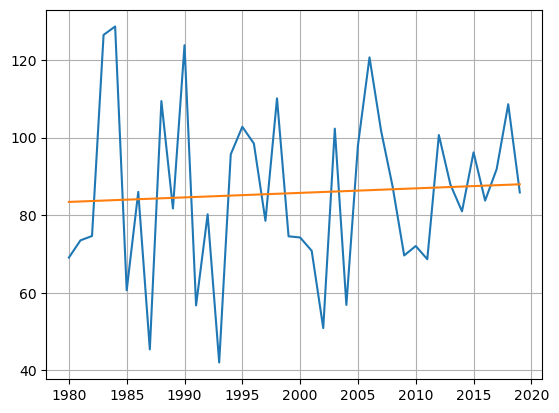

In [57]:
from matplotlib import pyplot as plt
# Plot the Data itself.
plt.plot(ds.year, data_1d)

# Calculate the Trendline
z = np.polyfit(ds.year, data_1d, 1)
p = np.poly1d(z)
#print(p)
x = ds.year
# Display the Trendline
plt.plot(ds.year, p(x))
plt.grid()

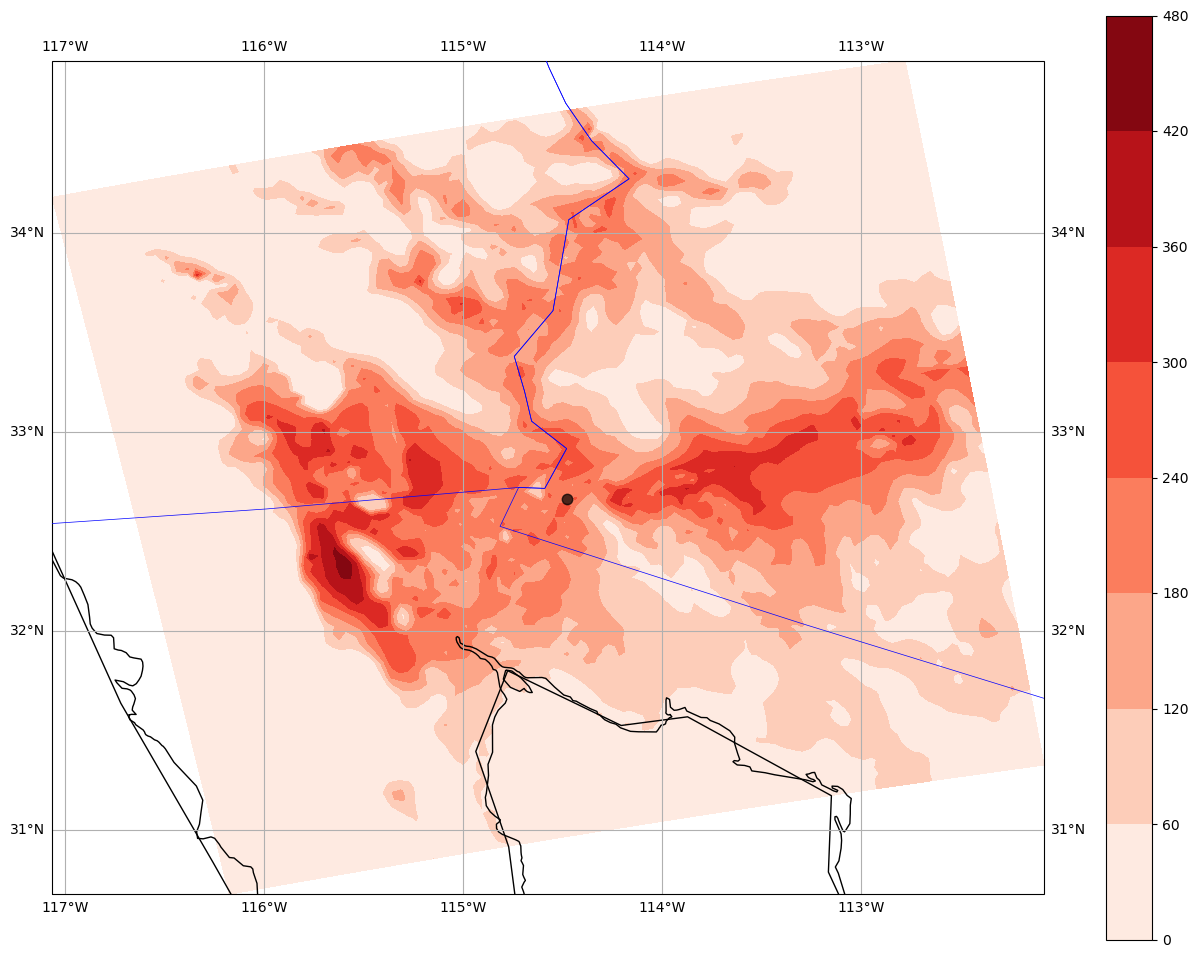

In [72]:
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

mm =ax.contourf(lon_2d, lat_2d, data_3d.mean(dim='year'), cmap = 'Reds')
                  
ax.plot(lon_pt, lat_pt, marker='.', color='black', markersize=15, alpha=0.7, transform=ccrs.Geodetic())

ax.coastlines()
 
ax.coastlines(lw=1, resolution='110m')
ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=.5, edgecolor='b')

gl = ax.gridlines(draw_labels=True)   
gl.xlines = gl.ylines = True
plt.colorbar(mm);

- 3) create/write dataframe to csv file

In [73]:
n_lat = lat_2d.shape[0]   # lat(y,x)
n_lon = lat_2d.shape[1]
#year_e = year_s + 1
n_year = year_e - year_s + 1
column_s = [str(x) for x in range(year_s, year_e + 1)]

lat_1d = np.zeros((n_lat*n_lon))
lon_1d = np.zeros((n_lat*n_lon))
data_2d = np.zeros((n_year, n_lat*n_lon))
#dataa_2d = np.zeros((2,3))

for year in range(year_s, year_e + 1):
    #print(year)
    ct = 0
    for ii in range(n_lat):
        for jj in range(n_lon):
            lat_1d[ct] = lat_2d[ii,jj]
            lon_1d[ct] = lon_2d[ii,jj]
            data_2d[year-year_s, ct] = data_3d[year-year_s, ii, jj]
            ct = ct + 1

df = pd.DataFrame(data = data_2d.transpose(),columns = column_s)  
df.insert(0, "lat", lat_1d, True)
df.insert(0, "lon", lon_1d-360, True)
#df = pd.DataFrame(data={'lat': lat_1d, 'lon': lon_1d, 'WBGT': data_2d})
df.to_csv(dir_o + 'ntf_hours_1980-2019.csv')
df.tail()

,lon,lat,1980,1981,1982,1983,1984,1985,1986,1987,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9995,-112.953064,34.842125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,-112.909363,34.848259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,-112.865662,34.854382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,-112.821960,34.860477,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9999,-112.778259,34.866562,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [74]:
df_avg = pd.DataFrame(data={'lat': lat_1d, 'lon': lon_1d, 'WBGT': data_2d.mean(axis=0)})
df_avg.to_csv(dir_o + 'ntf_hours_1980-2019_mean.csv')
df_avg.tail()

,lat,lon,WBGT
9995,34.842125,247.046936,0.000
9996,34.848259,247.090637,0.000
9997,34.854382,247.134338,0.000
9998,34.860477,247.178040,0.175
9999,34.866562,247.221741,0.400
